# Hierarchical Clustering

In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')

In [9]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### check for missing data

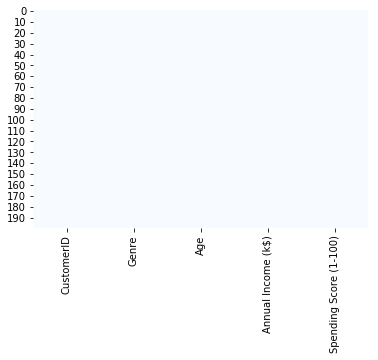

In [10]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='Blues')

### Selecting the feature matrix

In [11]:
x = dataset.iloc[:,[3,4]].values

### choosing the optimal number of clusters with the Dendrogram

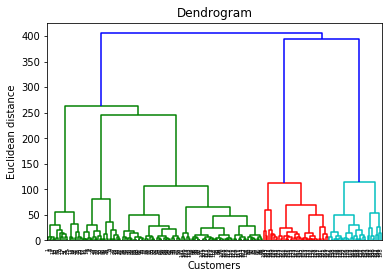

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

### Fitting the model with the optimal Clsuter number

In [13]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = HC.fit_predict(x)

### Visulaizing the clusters

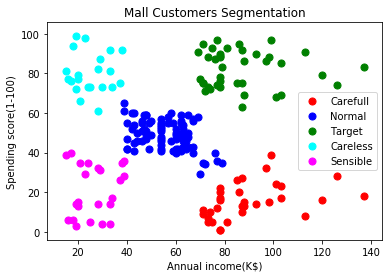

In [14]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='red',label='Carefull')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='blue',label='Normal')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,c='cyan',label='Careless')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,c='magenta',label='Sensible')
plt.title('Mall Customers Segmentation')
plt.xlabel('Annual income(K$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()